In [171]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [189]:
def convert_dg_to_dag(input_list: list) -> nx.DiGraph:
    """
    Converts a directed graph (DG) to a directed acyclic graph (DAG).

    Parameters:
    input_list (list): List of lists of strings (a degenerate string)

    Returns:
    nx.DiGraph: The converted DAG.
    """

    graph = nx.DiGraph()
    graph.add_node(0, label="$")
    previous_dummy_node = 0
    node_id = 1

    for sublist in input_list:
        current_level = []
        if not sublist:  # if the sublist is empty, consider it a dummy node.
            continue

        for item in sublist: # iterate over the characters in the string in the sublist
            graph.add_node(node_id, label=item)
            graph.add_edge(previous_dummy_node, node_id)
            current_level.append(node_id)
            node_id += 1

        # create a new dummy node
        previous_dummy_node = node_id
        graph.add_node(node_id, label="$")
        node_id += 1

        # connect the current level to the new dummy node
        for node in current_level:
            graph.add_edge(node, previous_dummy_node)

    # remove the last node
    graph.remove_node(previous_dummy_node)
    return graph

def draw_graph(G):
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot", root=0, args="-Grankdir=LR -Gsplines=polyline -Gsep=+75,75")
    node_labels = nx.get_node_attributes(G, "label")

    color_map = ['pink' if node_labels[node] == "$" else 'lightblue' for node in G]

    plt.figure(figsize=(20, 6))  # Set the figure size.
    nx.draw(G, pos, node_color=color_map, with_labels=True, labels=node_labels)
    plt.show()  # Display the figure

def generate_degenerate_strings(max_length, num_subsets):
    alphabet = ['A', 'C', 'G', 'T']
    degenerate_strings = []

    for _ in range(num_subsets):
        subset_length = random.randint(0, max_length)  # Length of subset can be 0 (empty set)
        subset = []
        for _ in range(subset_length):
            subset.append(random.choice(alphabet))
        degenerate_strings.append(subset)

    return degenerate_strings


In [191]:
X = generate_degenerate_strings(6, 10)
print(X)

[['A', 'C'], ['T', 'A', 'C', 'A'], [], ['T', 'C', 'G', 'G', 'C'], ['A', 'C', 'C', 'C', 'T'], ['G'], ['C', 'G', 'C', 'G'], [], ['A', 'C', 'C', 'C', 'A'], ['G', 'T', 'A', 'A', 'A', 'C']]


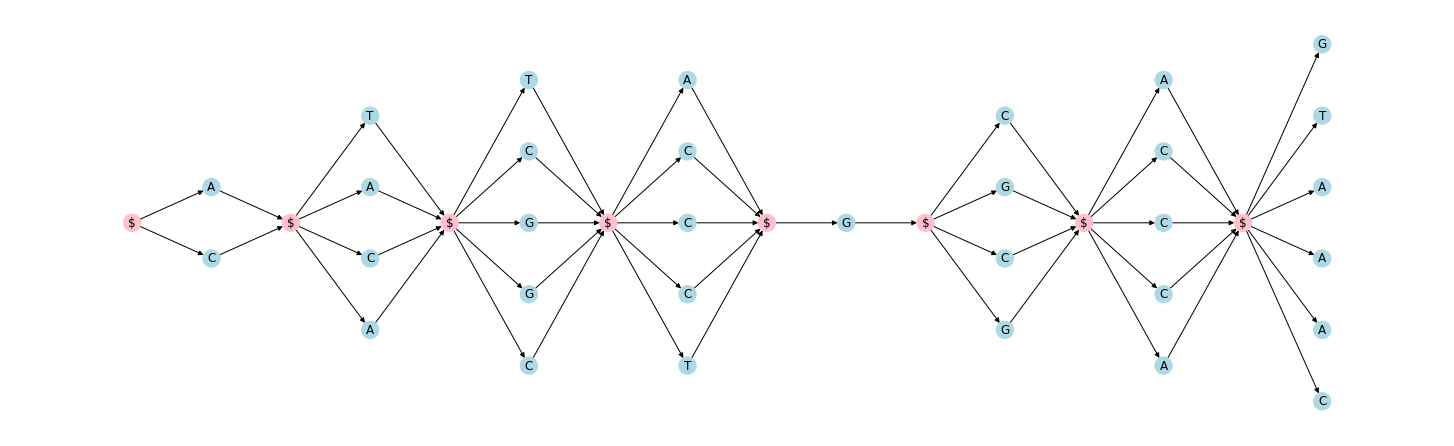

In [192]:
G = convert_dg_to_dag(X)
draw_graph(G)

# Problema

Cosa sono (`subset-`)`rank` e (`subset-`)`select` su questo DAG (che alla fine, è un albero)? Su una stringa degenere Alanko et. al hanno definito, data $X$ una stringa degenere, le seguenti funzioni:

* `subset-rank`$_X(i,c)$: numero di subset tra i primi $i$ subset di $X$ che contengono $c$
* `subset-select`$_X(i,c)$: indice del $i$-esimo subset di $X$ che contiene $c$

## Soluzione dei danesi

### Non ci sono insiemi vuoti

Prendono la concatenzione di tutte le stringhe di $X$ e la chiamano $S$. Associano a questo una bitmap $R$, la quale per ogni $X_1$, scrive un $1$ e poi $|X_i| -1$ zeri. Alla fine appende un $1$. 

![](https://i.imgur.com/LSPxyeJ.png)

In questo modo 

$$subset-rank(i,c) = rank_S(select_R(i+1,1)-1, c)$$
$$subset-select(i,c) = rank_R(select_S(i,c),1)$$

Quindi devono usare un Wavelet Tree per $S$ e una struttura tipo RRR per $R$.
